## Set up

Please see the note.md to have note knowledge.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MNIST

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

c:\Users\tanda\anaconda3\envs\handons-DS\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
X, y = mnist.data, mnist.target

In [18]:
type(X[0])

numpy.ndarray

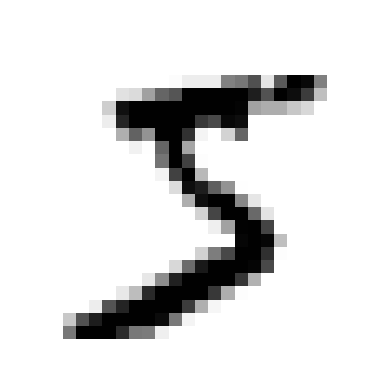

In [20]:
def plot_digit(image_data: np.ndarray):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [21]:
y[0]

'5'

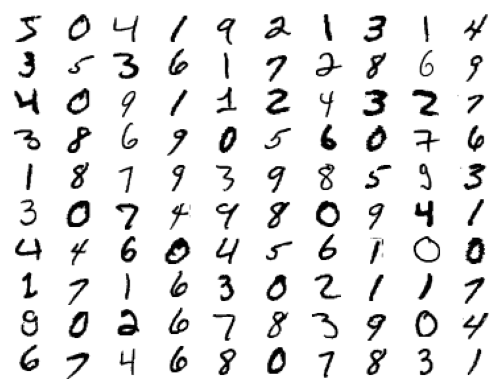

In [22]:
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [23]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [25]:
y_train_5 = y_train == "5"
y_test_5 = y_test == "5"

## Training a binary classifier

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

## Performance measures

The way we measures performance in classification task is far different from regression task.

### Measure accuracy using cross-validation

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [31]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [32]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [35]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

### Precision, recall and $F_1$ score

In [36]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # 3530 / (3530 + 687)

0.8370879772350012

In [37]:
recall_score(y_train_5, y_train_pred)  # 3530 / (3530 + 1891)

0.6511713705958311

In [38]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### The precision/recall trade off

Typically, the easier you accept a number to be true, the higher the recall but the lower the precision.<br> 
At the two most extreme: 
- If you accept everything to be true, then recall = 1, but precision is very low. 
- If you deny everything to be false but the most confident one, then precision = 1 (very likely), but recall is very low.

The 'easy' described above can be quantitative in sklearn using decision function.

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])